In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f=open('PEC_H.dat')
boolean=True
line=f.readline()[:-1].split()
line=f.readline()[:-1].split()
reactions=[]
while boolean:
    if '/TYPE' not in line:
        boolean=False
    else :
        wavelenght=line[0]
        reac_type=line[8]
        Nde=int(line[1])
        Nte=int(line[2])
        nde=0
        nte=0
        den=[]
        te=[]
        data=np.zeros((Nde,Nte))
        while (nde<Nde):
            line=f.readline()[:-1].split()
            nde+=len(line)
            den=den+line
        den=np.array(den,dtype=float)
        while (nte<Nte):
            line=f.readline()[:-1].split()
            nte+=len(line)
            te=te+line
        te=np.array(te,dtype=float)
        nde=0
        for nde in range (Nde):
            nte=0
            while (nte<Nte):
                line=f.readline()[:-1].split()
                for j in range (len(line)):
                    data[nde,nte]=line[j]
                    nte+=1
        reactions.append([data,wavelenght,reac_type])
        line=f.readline()[:-1].split()
            
            

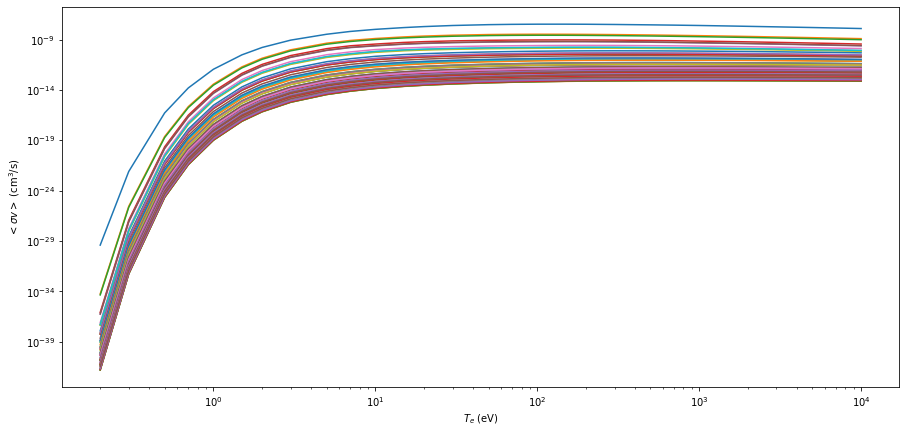

In [3]:
plt.figure(figsize=(15,7))
for i in range (len(reactions)):
    if reactions[i][2]=='EXCIT':
        plt.plot(te,reactions[i][0][13,:],label=reactions[i][1])
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('$T_e$ (eV)')
        plt.ylabel('$<\sigma v>$ (cm$^{3}$/s)')
        #plt.xlim([1,10])
        #plt.ylim([0,0.2e-8])
        #plt.legend()

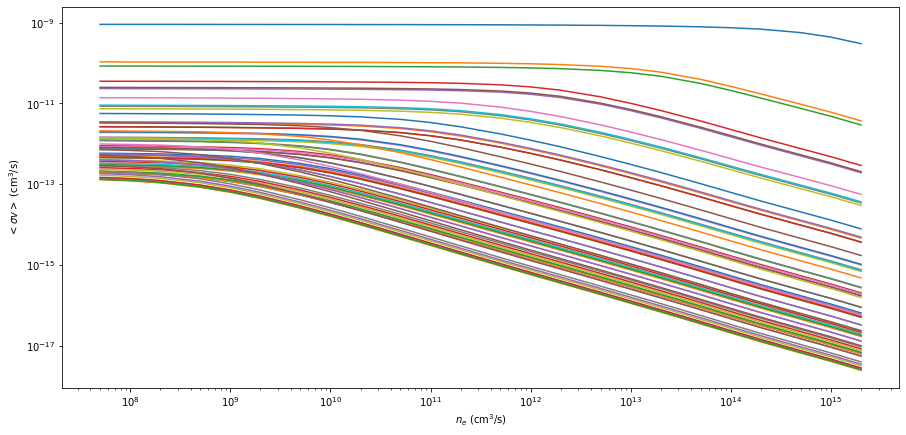

In [4]:
plt.figure(figsize=(15,7))
for i in range (len(reactions)):
    if reactions[i][2]=='EXCIT':
        plt.plot(den,reactions[i][0][:,7],label=reactions[i][1])
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('$n_e$ (cm$^3$/s)')
        plt.ylabel('$<\sigma v>$ (cm$^{3}$/s)')
        #plt.legend()

te[7]=3eV
den[13]=1e12cm^-3

In [5]:
Ndens=13
Ntemp=7
wvls_excit=[]
wvls_recom=[]
heights_excit=[]
heights_recom=[]
for reaction in reactions:
    if reaction[2]=='EXCIT':
        wvls_excit.append(float(reaction[1][:-1])/10)
        heights_excit.append(reaction[0][Ndens,Ntemp])
    if reaction[2]=='RECOM':
        wvls_recom.append(float(reaction[1][:-1])/10)
        heights_recom.append(reaction[0][Ndens,Ntemp])   

(80.0, 1200.0)

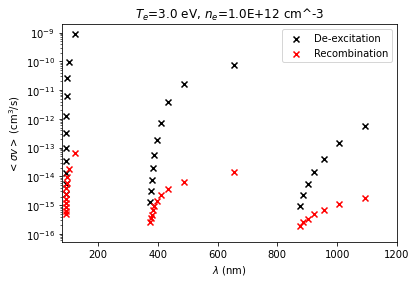

In [6]:
plt.scatter(wvls_excit,heights_excit,marker='x',color='black',label='De-excitation')
plt.scatter(wvls_recom,heights_recom,marker='x',color='red',label='Recombination')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('$<\sigma v>$ (cm$^{3}$/s)')
plt.legend()
plt.title('$T_e$={} eV, $n_e$={:.1E} cm^-3'.format(te[Ntemp],den[Ndens]))
plt.xlim([80,1200])


In [7]:
for i in range (len(reactions)):
    reaction=reactions[i]
    if reaction[2]=='EXCIT':
        if reaction[1]=='6561.9A':
            H_alfa=reaction
        if reaction[1]=='4860.6A':
            H_beta=reaction
        if reaction[1]=='4339.9A':
            H_gamma=reaction
    if reaction[2]=='RECOM':
        if reaction[1]=='6561.9A':
            H_alfa_r=reaction
        if reaction[1]=='4860.6A':
            H_beta_r=reaction
        if reaction[1]=='4339.9A':
            H_gamma_r=reaction

Text(0.5, 0, '$T_e$ (eV)')

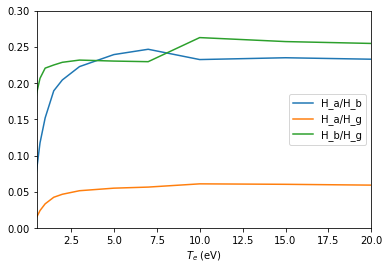

In [8]:
Ndens=13
plt.figure()
plt.plot(te,H_beta[0][Ndens]/H_alfa[0][Ndens],label='H_a/H_b')
plt.plot(te,H_gamma[0][Ndens]/H_alfa[0][Ndens],label='H_a/H_g')
plt.plot(te,H_gamma[0][Ndens]/H_beta[0][Ndens],label='H_b/H_g')
plt.legend()
plt.xlim([0.5,20])
plt.ylim([0,0.3])
plt.xscale('linear')
plt.xlabel('$T_e$ (eV)')

Text(0.5, 0, '$n_e$ (cm^{-3})')

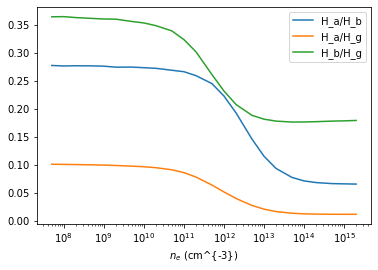

In [9]:
Ntemp=7
plt.figure()
plt.plot(den,H_beta[0][:,Ntemp]/H_alfa[0][:,Ntemp],label='H_a/H_b')
plt.plot(den,H_gamma[0][:,Ntemp]/H_alfa[0][:,Ntemp],label='H_a/H_g')
plt.plot(den,H_gamma[0][:,Ntemp]/H_beta[0][:,Ntemp],label='H_b/H_g')
plt.legend()
plt.xscale('log')
plt.xlabel('$n_e$ (cm^{-3})')

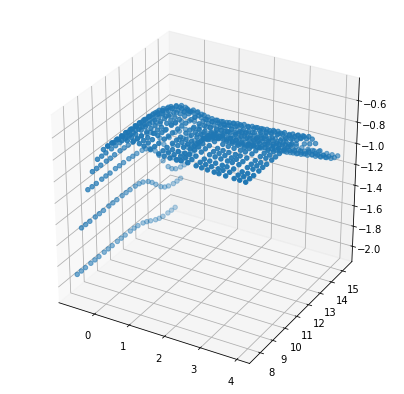

In [10]:
%matplotlib inline
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
xx,yy=np.meshgrid(te,den)
ax.scatter(np.log10(xx),np.log10(yy),np.log10(H_beta[0]/H_alfa[0]),label='H_a/H_b')

        